<a href="https://colab.research.google.com/github/jakob-steuer/chemoinformatics_2025/blob/main/chemoinformatics_5_MD_simulation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created with Google Gemini v2.5 Pro

# Molecular Simulation Analysis

Please run the following two cells by clicking the 'Play' butten.

In [ ]:
# Clone a repository from GitHub to access the simulation data
!git clone https://github.com/jakob-steuer/FHNW-Summer-School-2025-MolSim-Analysis.git

In [ ]:
# Let's install the required python packages
%pip install MDAnalysis matplotlib scikit-learn mdakit-sasa nglview==3.0.8

# Introduction to Molecular Simulation of RNA for Drug Discovery

In this tutorial we will go through some basic steps toward the **analysis** of **molecular dynamics (MD)simulations** of an **RNA riboswitch**.
In this exercise, you will have the opportunity to apply your knowledge of computational chemistry and bioinformatics to an interesting research problem in **drug discovery**.

<img src="https://www.mdpi.com/molecules/molecules-26-03384/article_deploy/html/images/molecules-26-03384-g002.png" width="80%">

From: Berdnikova, D. V., Carloni, P., Krauß, S., & Rossetti, G. (2021). Role and Perspective of Molecular Simulation-Based Investigation of RNA–Ligand Interaction: From Small Molecules and Peptides to Photoswitchable RNA Binding. Molecules, 26(11), 3384. https://doi.org/10.3390/molecules26113384




## Molecular Simulation in Drug Discovery

**Molecular simulation** has become an indispensable tool in modern **drug discovery**.
By computationally modeling the behavior of biological macromolecules and their interactions with potential drug molecules, we can gain insights into the **molecular basis of disease** and **design novel therapeutics**.

Techniques such as molecular dynamics allow us to simulate the time-evolution of a system at the atomic level providing a **"computational microscope"** to observe processes that are often difficult to study experimentally.
These simulations can be used to predict **binding affinities**, understand **mechanisms of action**, and identify new **binding sites**, thereby accelerating the drug development pipeline.

## The Challenge and Promise of RNA Simulations

While much of the focus in computational drug discovery has been on protein targets, **RNA** is emerging as a new frontier.

RNA molecules play a wide range of crucial roles in the cell, from **carrying genetic information** to **catalyzing biochemical reactions**.
However, simulating RNA presents unique challenges compared to proteins. The high charge density of the phosphate backbone, the flexibility of the sugar-phosphate backbone, and the complex, often non-canonical, tertiary structures of RNA make accurate and efficient simulation a difficult task.

Despite these challenges, the increasing number of identified RNA drug targets makes the development of robust simulation protocols a **key area of research in medicinal chemistry**.

Accurate simulation models for RNA require a delicate balancing of underlying driving forces.

<img src="https://wires.onlinelibrary.wiley.com/cms/asset/14c103e4-3020-4149-9872-086169b39849/wrna1396-toc-0001-m.jpg" width="40%">

From: Vangaveti, S., Ranganathan, S. V., & Chen, A. A. (2016). Advances in RNA molecular dynamics: a simulator’s guide to RNA force fields. WIREs RNA, 8(2). https://doi.org/10.1002/wrna.1396

## Riboswitches: RNA's Molecular Switches

A fascinating class of RNA drug targets are **riboswitches**.
These are regulatory regions found in messenger RNA (mRNA) that can directly bind to small molecules, or ligands, and in response, alter their three-dimensional structure.
This conformational change, in turn, regulates the expression of the gene encoded by the mRNA.
Because they are involved in the regulation of essential metabolic pathways in bacteria, riboswitches are attractive targets for the development of new antibiotics.

In this exercise, we will focus on the **guanidine-II riboswitch**.
This riboswitch, found in various bacteria, controls the expression of genes involved in guanidine detoxification.

It functions as a dimer, with each monomeric aptamer domain capable of binding a single guanidine molecule.
The binding of the ligand stabilizes a conformation that promotes gene expression.

## The Exercise: Analyzing Ligand Binding Events

You will be working with MD trajectories of the dimerized aptamer domains of the guanidine-II riboswitch in complex with a specially designed, **divalent guanidine ligand**.

This ligand, with two guanidinium groups connected by a linker, was designed to bridge the two binding sites of the riboswitch dimer.

The simulation data you will be analyzing is from the following publication:

Steuer, J., Sinn, M., Eble, F., Rütschlin, S., Böttcher, T., Hartig, J. S., & Peter, C. (2024). Cooperative binding of bivalent ligands yields new insights into the guanidine-II riboswitch. NAR Genomics and Bioinformatics, 6(3). https://doi.org/10.1093/nargab/lqae132

<img src="https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/nargab/6/3/10.1093_nargab_lqae132/2/m_lqae132fig1.jpeg?Expires=1759496277&Signature=ENjfYKAkjNXeNVBsObC~8xpV7FdJ3hvNzxAX~Mu~yaq33ctRhCFidpSm5hND7RWSlST4ejOaBz72RZRB6-otiYVtc58rWc1MPI0Pyj90vSDULilWCOs00-unSFZOXkBoQTDV3fSeYfrUaA~yVeiFgHLXM646d6TLU5crFdc8xX28mfbGaFoEGV2fwHq0xdDp4fI3yGNlZ3cOId2KZYGVlwRCNsuOEUiUJrYTxyim-5fJZQB~yw8xwVoGL55cwL9eCKdOSlT4soAZ960nsFJ0i7VwzCxIXAg4Wk47g3YpsmjYK9KAw2JeEmMKDAFPAVsIhJS5vKDSg3BZl0~uibYVSA__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA" width="80%">

Your task will be to analyze these trajectories to observe and characterize the ligand binding events.

One of the key findings in the paper was the spontaneous binding of the divalent ligand to the second binding site, a rare event to capture in simulations.

By analyzing these trajectories, you will gain hands-on experience in the analysis of MD simulations and contribute to our understanding of the molecular mechanism of this promising RNA drug target.

# Basic Simulation Analysis

We will start by analyzing the first trajectory, where no ligand binding occurs, using some standard tools.

Later we will include two more simulation trajectories with ligand binding in which ligand binding events occur.

First we need to import some of the packages we are going to use throughout this tutorial.

In [ ]:
# Let's import the required python packages
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv
import pandas as pd
import os
from tqdm.notebook import tqdm

from google.colab import output
output.enable_custom_widget_manager()

## Open Simulation Data in the Notebook

For this course, the published simulation data has already been processed to reduce the length and size of the simulation trajectories.
This includes removing all solvent molecules from the simulations and focussing only on the trajectories close to the binding events.

We will download them using the following code:

In [ ]:
# Define the paths to your trajectory and topology files
pdb_file = "./FHNW-Summer-School-2025-MolSim-Analysis/data/structure.pdb" # topology
xtc_file_1 = "./FHNW-Summer-School-2025-MolSim-Analysis/data/traj.simulation_1.0mus-4mus.dt1ns.xtc" # trajectory 1
xtc_file_2 = "./FHNW-Summer-School-2025-MolSim-Analysis/data/traj.simulation_4.6mus-10mus.dt1ns.xtc" # trajectory 2
xtc_file_3 = "./FHNW-Summer-School-2025-MolSim-Analysis/data/traj.simulation_7.3mus-7mus.dt1ns.xtc" # trajectory 3

# Load the trajectory using MDAnalysis
print("Loading trajectory...")
# MDAnalysis stores simulation data in so-called universes
universe_1 = mda.Universe(pdb_file, xtc_file_1)
universe_2 = mda.Universe(pdb_file, xtc_file_2)
universe_3 = mda.Universe(pdb_file, xtc_file_3)

universes = [universe_1, universe_2, universe_3]
sim_names = ['Simulation 1', 'Simulation 4', 'Simulation 7']

print("Trajectories loaded successfully!")
print(universe_1)

## Visualize the RNA Structure

We will use nglview, a simple visualization tool that allows you to inspect the molecular system you are working on from inside the notebook on the fly.

For more complex visualization tasks it is highly recommended to use a dedicated molecular viewer, sauch as ChimeraX, VMD, PyMOL or the SAMSON software you know from Wednesday.

In [ ]:
# Create the NGLview widget from the MDAnalysis Universe
view = nv.show_mdanalysis(universe_1)
view.layout.width = '800px'
view.layout.height = '600px'

view.clear_representations()

view.add_representation('ball+stick', selection='nucleic', color='grey',
                        aspect_ratio=1.5, name='Ligand')

view.center('resname BGD')
view.background = 'white'

view

## Root Mean Square Deviation (RMSD)

The **RMSD** measures the average distance between the atoms of a structure at a given timepoint and a reference structure.
It's the go-to metric for assessing the structural stability of a simulation.

- A low and stable RMSD (i.e., it plateaus) suggests the molecule has reached equilibrium and is not undergoing major conformational changes.

- A continuously increasing or wildly fluctuating RMSD indicates significant structural changes, instability, or that the system has not yet equilibrated.

In [ ]:
from MDAnalysis.analysis import align, rms
# Select the atoms for the RMSD calculation (e.g., RNA)
# For proteins, you would typically use 'protein and name CA'
selection_string = 'nucleic'
nucleic_atoms = universe_1.select_atoms(selection_string)

# Align the trajectory to the first frame (the reference)
print("\nAligning trajectory...")
alignment = align.AlignTraj(universe_1,
                            universe_1,
                            select=selection_string,
                            in_memory=True).run(verbose=True)
print("Alignment complete.")

print("Calculating RMSD...")
R = rms.RMSD(nucleic_atoms,
             nucleic_atoms,
             select=selection_string)
R.run(verbose=True)
print("RMSD calculation complete.")

rmsd_values = R.results.rmsd[:, 2]

In [ ]:
# Plot the RMSD using the matplotlib package
time_ns = np.arange(4001)

plt.figure(figsize=(10, 6))
plt.plot(time_ns, rmsd_values, lw=2, label='RMSD')

window_size = 100
running_avg = np.convolve(rmsd_values, np.ones(window_size)/window_size, mode='valid')
plt.plot(time_ns[window_size-1:], running_avg, lw=2.5, color='red', label=f'Running Avg (window={window_size})')

plt.title('RMSD of RNA vs. Time')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (nm)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Exercise 1

**Calculate Visualize the RMSD of the Second Simulation Trajectory**

#### 🔍 Solution (Hidden - Expand to see the answer)

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>


**Calculate Visualize the RMSD of the Second Simulation Trajectory:**

```from MDAnalysis.analysis import align, rms
# Select the atoms for the RMSD calculation (e.g., RNA)
# For proteins, you would typically use 'protein and name CA'
selection_string = 'nucleic'
nucleic_atoms = universe_1.select_atoms(selection_string)

# Align the trajectory to the first frame (the reference)
print("\nAligning trajectory...")
alignment = align.AlignTraj(universe_2,
                            universe_2,
                            select=selection_string,
                            in_memory=True).run(verbose=True)
print("Alignment complete.")

# Calculate RMSD against the current frame (0) of the reference
print("Calculating RMSD...")
R = rms.RMSD(nucleic_atoms,
             nucleic_atoms,
             select=selection_string)
R.run(verbose=True)
print("RMSD calculation complete.")

rmsd_values = R.results.rmsd[:, 2]

# Plot the RMSD using the matplotlib package
time_ns = np.arange(4001)

window_size = 100
running_avg = np.convolve(rmsd_values, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 6))
plt.plot(time_ns, rmsd_values, lw=2)

plt.plot(time_ns[window_size-1:], running_avg, lw=2.5, color='red', label=f'Running Avg (window={window_size})')


plt.title('RMSD of RNA vs. Time')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (nm)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
```

</details>

## Root Mean Square Fluctuation (RMSF)

The **RMSF** measures the fluctuation of each individual residue over the course of the simulation. Instead of showing how the whole structure changes over time (like RMSD), RMSF shows which parts of the structure are the most mobile.

- High RMSF values indicate regions of high flexibility, such as loops or the N/C-termini of proteins.

- Low RMSF values indicate stable regions, like the core of a protein or residues constrained by ligand binding or base-pairing in RNA.

In [ ]:
# Calculate RMSF
print("Calculating RMSF...")
# Select the atoms for the RMSF calculation
selected_atoms = universe_1.select_atoms(selection_string)
R_rmsf = rms.RMSF(selected_atoms)
R_rmsf.run(verbose=True)
print("RMSF calculation complete.")

rmsf_per_atom = R_rmsf.results.rmsf

In [ ]:
# Scatter plot where each point's color is its RMSF value

plt.figure(figsize=(12, 6))

scatter = plt.scatter(selected_atoms.indices, rmsf_per_atom,
                      c=rmsf_per_atom, cmap='Reds', s=10, zorder=2)
plt.plot(selected_atoms.indices, rmsf_per_atom, lw=1.5, color='grey', zorder=1)

plt.vlines(len(rmsf_per_atom)/2, ymin=0, ymax=4, ls='--', color='grey', label='Chain End/Start')

cbar = plt.colorbar(scatter)
cbar.set_label('RMSF (Å)', fontsize=12)

plt.legend()
plt.title('RMSF of RNA Atoms', fontsize=16)
plt.xlabel('Atom Index', fontsize=12)
plt.ylabel('RMSF (Å)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# show the RMSF values for each atom in the PDB structure
nucleic = universe_1.select_atoms("nucleic")

nucleic.tempfactors = rmsf_per_atom

view = nv.show_mdanalysis(nucleic)
view.layout.width = '800px'
view.layout.height = '600px'

view.clear_representations()

# Add a new representation, coloring by B-factor (which now holds our RMSF)
view.add_representation('ball+stick', color_scheme='bfactor',
                        selection='nucleic',
                        color_domain=[rmsf_per_atom.min(), rmsf_per_atom.max()])

view

## Solvent Accessible Surface Area (SASA)

The **SASA** is the surface area of the molecule that is accessible to the solvent.
It's a great way to measure changes in the molecule's overall shape and compactness.

- A decreasing SASA can indicate that the molecule is folding or becoming more compact.

- An increasing SASA can suggest unfolding or a conformational change that exposes more of the molecule to the solvent.

It's particularly useful for observing how a binding event might bury a previously exposed surface.

In [ ]:
from mdakit_sasa.analysis.sasaanalysis import SASAAnalysis

# Initialize the SASA calculation, enabling parallel processing
print("\nCalculating SASA...")
sasa_calculator = SASAAnalysis(universe_1, n_jobs=-1)

sasa_results = []

# The SASA calculation is computationally demanding, we can reduce the number of simulation snapshots
for ts in tqdm(universe_1.trajectory[::10], desc="Calculating SASA per frame"):
    sasa_calculator.run(start=ts.frame, stop=ts.frame+1)
    sasa_results.append(sasa_calculator.results.total_area[0])

total_sasa_per_frame = np.array(sasa_results)
print("SASA calculation complete.")

In [ ]:
# Plot the SASA using the matplotlib package
plt.figure(figsize=(10, 6))
plt.plot(time_ns[::10], total_sasa_per_frame, lw=2)

plt.title('Total Solvent Accessible Surface Area vs. Time')
plt.xlabel('Time (ns)')
plt.ylabel('Total SASA (nm²)')
plt.grid(True)
plt.show()

## Radius of Gyration (Rg)

The **Radius of Gyration (Rg)** is a measure of a molecule's overall compactness.
It's calculated as the root mean square distance of the atoms from their common center of mass.
Think of it as describing the effective "size" of the molecule in each frame.
It's complementary to SASA but focuses on the mass distribution rather than surface exposure.

- A stable Rg value indicates the molecule maintains a consistent size and shape.

- A decreasing Rg suggests the molecule is becoming more compact (folding).

- An increasing Rg suggests it's expanding or unfolding.

In [ ]:
print("\nCalculating Radius of Gyration (Rg)...")
# In MDAnalysis, you calculate Rg for each frame by iterating through the trajectory.
# The .radius_of_gyration() method is called on an AtomGroup.
rg_values = [universe_1.atoms.radius_of_gyration() for ts in universe_1.trajectory]

print("Rg calculation complete.")

In [ ]:
# Plot the RG using the matplotlib package
plt.figure(figsize=(10, 6))
plt.plot(time_ns, rg_values, lw=2, label='Rg')

window_size = 100
running_avg = np.convolve(rg_values, np.ones(window_size)/window_size, mode='valid')
plt.plot(time_ns[window_size-1:], running_avg, lw=2.5, color='red', label=f'Running Avg (window={window_size})')

plt.title('Radius of Gyration (Rg) vs. Time')
plt.xlabel('Time (ns)')
plt.ylabel('Rg (nm)')
plt.grid(True)
plt.legend()
plt.show()

## Hydrogen Bonds
**Hydrogen bonds** are critical for the stability of biological macromolecules, from holding RNA base pairs together to anchoring a ligand in its binding pocket.
By counting the number of hydrogen bonds over time, you can directly monitor the formation and breaking of key interactions.

For this exercise, you could monitor H-bonds within the entire RNA or, more specifically, between the ligand and the RNA.

In [ ]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis

all_results = []

for universe, name in zip(universes, sim_names):
    print(f"\nProcessing {name}...")

    hbond_analyzer = HydrogenBondAnalysis(
        universe=universe,
        # Donors are heavy atoms in the ligand (O or N)
        donors_sel='resname BGD and name N*',
        # Hydrogens are attached to the donors
        hydrogens_sel='resname BGD and name H1 H2 H14 N6 H15 H16 H17 H18',
        # Acceptors are heavy atoms in the RNA
        acceptors_sel='segid A and (name O* or name N*)',
        # Relax the distance cutoff slightly
        d_a_cutoff=10
    )

    hbond_results = []
    for ts in tqdm(universe.trajectory[::10], desc=f"Analyzing {name}"):
        hbond_analyzer.run(start=ts.frame, stop=ts.frame+1)

        for hbond in hbond_analyzer.results.hbonds:
            frame = hbond[0]
            acceptor_resid = universe.atoms[int(hbond[3])].resid
            hbond_results.append((frame, f"Ligand-H", f"RNA-Res{acceptor_resid}"))

    hbond_df = pd.DataFrame(hbond_results, columns=['Frame', 'Donor', 'Acceptor'])
    hbond_df['Simulation'] = name
    all_results.append(hbond_df)

print("\nAll hydrogen bond calculations complete.")
combined_df = pd.concat(all_results)


if not combined_df.empty:
    combined_df['H-Bond'] = combined_df['Donor'] + ' to ' + combined_df['Acceptor']
    all_unique_hbonds = sorted(combined_df['H-Bond'].unique())

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)
    fig.suptitle('Hydrogen Bond Presence Over Time', fontsize=16)

    for i, name in enumerate(sim_names):
        subset_df = combined_df[combined_df['Simulation'] == name]
        axes[i].set_yticks(range(len(all_unique_hbonds)))
        axes[i].set_yticklabels(all_unique_hbonds)
        axes[i].scatter(subset_df['Frame'], subset_df['H-Bond'], marker='|', s=100)
        axes[i].set_ylabel('HBond')
        axes[i].set_title(name)
        axes[i].grid(axis='x', linestyle='--', alpha=0.6)

    axes[-1].set_xlabel('Frame Number')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("\nNo hydrogen bonds were found in any simulation with the given criteria.")

### Question 1

**How do you interprete the formation of h-bonds between the ligand and the RNA in simulation trajectories 4 and 7?**

## Distance Ligand to Pocket

To investigate the position of the ligand with respect to the RNA, we can monitor the distance between the unbound side of the ligand and the center of the binding pocket.



In [ ]:
from MDAnalysis.lib.distances import distance_array

all_results = []

print("Calculating distances for all universes...")
for universe, name in zip(universes, sim_names):
    ligand_atom = universe.select_atoms('resname BGD and around 2 name C1')
    binding_pocket = universe.select_atoms('resid 7 8 9 10')

    distance_results = []
    for ts in tqdm(universe.trajectory[::1], desc=f"Processing {name}"):
        # Calculate the center of mass of the binding pocket
        pocket_com = binding_pocket.center_of_mass()

        # Get the position of the single ligand atom
        ligand_pos = ligand_atom.positions[0]

        # Calculate the Euclidean distance between the two points
        dist = np.linalg.norm(ligand_pos - pocket_com)

        distance_results.append({'Frame': ts.frame, 'Distance': dist})

    dist_df = pd.DataFrame(distance_results)
    dist_df['Simulation'] = name
    all_results.append(dist_df)

print("\nAll distance calculations complete.")

combined_df_ligtopocket = pd.concat(all_results)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle("Distance: Ligand (C1) to Binding Pocket Center", fontsize=16)

for i, name in enumerate(sim_names):
    subset_df = combined_df_ligtopocket[combined_df_ligtopocket['Simulation'] == name]

    axes[i].plot(subset_df['Frame'], subset_df['Distance'], label=name)
    axes[i].set_ylabel('Distance (Å)')
    axes[i].set_title(name)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Set the common x-axis label and a shared y-axis limit
axes[-1].set_xlabel('Frame Number')
plt.ylim(bottom=0) # Set a common y-axis starting at 0

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Question 2

**How do you interprete the plotted distances between the ligand and the RNA in the three simulation trajectories?**

### Question 3

**How do you interprete the plotted distances between the ligand and the RNA in the three simulation trajectories?**

**How do they compare to the h-bond analysis in the previous example?**

# Dimensionality Reduction and Clustering

To analyze a molecule's movements, we first describe its 3D shape using numerical features called descriptors. These descriptors ignore the molecule's overall tumbling and focus only on the internal changes in its structure.

**Dihedral Angles**
Dihedral angles are a simple descriptor that measures the twists in a protein's backbone. They are excellent for capturing the fundamental folding and flexibility of the protein chain.

**Pairwise Distances**
Pairwise distances describe the distances between different atoms or parts of the molecule. This provides a more detailed, global picture of the molecule's overall shape and how its different regions move closer together or further apart.

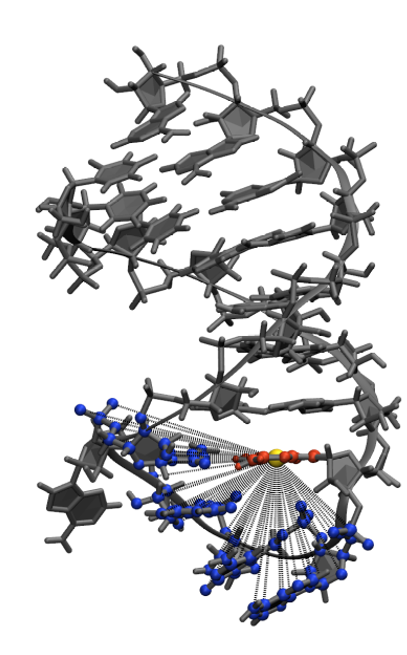

Pairwise distances between atoms surrounding a ligand binding pocket (blue) and a reference point (yellow).

From: Steuer, J., Kukharenko, O., Riedmiller, K., Hartig, J. S., & Peter, C. (2021). Guanidine-II aptamer conformations and ligand binding modes through the lens of molecular simulation. Nucleic Acids Research, 49(14), 7954–7965. https://doi.org/10.1093/nar/gkab592


## Principal Component Analysis (PCA)

**PCA** is a powerful technique used to identify the dominant, large-scale motions in a simulation.
It reduces the complex, high-dimensional movements of all atoms into a few "principal components" (PCs) that describe the most significant collective motions.

For example, PC1 might describe a hinge-like opening and closing of two domains, while PC2 describes a twisting motion.

By projecting the trajectory onto the first two PCs (PC1 and PC2), we can create a 2D map of the molecule's "conformational landscape."

Clusters in the plot represent stable or semi-stable conformational states.

Paths between clusters represent transitions from one state to another.



<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250526125548648108/What-is-Dimensionality-Reduction-.webp" width="60%">

From: https://www.geeksforgeeks.org/machine-learning/dimensionality-reduction/




<img src="https://numxl.com/wp-content/uploads/principal-component-analysis-pca-featured.png" width="60%">

From: https://numxl.com/blogs/principal-component-analysis-pca-101/


In [ ]:
from MDAnalysis.analysis import distances
from sklearn.decomposition import PCA

all_distance_data = []

print("Calculating pairwise distances for all universes...")
for universe, name in zip(universes, sim_names):
    rna_atoms = universe.select_atoms('nucleic')
    ligand_atoms = universe.select_atoms('resname BGD')

    distance_list = []
    for ts in tqdm(universe.trajectory, desc=f"Processing {name}"):
        dist_matrix = distances.distance_array(rna_atoms, ligand_atoms)
        distance_list.append(dist_matrix.flatten())

    all_distance_data.append(np.array(distance_list))

print("Distance calculation complete.")

# Combine data and perform a single PCA
combined_distance_data = np.vstack(all_distance_data)

print("\nPerforming PCA on combined data...")
pca = PCA(n_components=2)
# Fit the PCA model on the combined data from all simulations
pca.fit(combined_distance_data)
print("PCA complete.")

In [ ]:
plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'green']

for i, (distance_data, name) in enumerate(zip(all_distance_data, sim_names)):
    # Transform each simulation's data into the PCA space
    projected_distances = pca.transform(distance_data)

    # Plot the projected data with a unique color and label
    plt.scatter(projected_distances[:, 0], projected_distances[:, 1],
                c=colors[i], label=name, alpha=0.5, s=20)

# Add labels, title, and legend
explained_variance = pca.explained_variance_ratio_
plt.title('PCA of RNA-Ligand Distances', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We can also compute the PCA for the art of the ligand that undergoes binding.

For this, we caluclate only the pairwise distances betwe the unbound end of the ligand, and the RNA residues that form the binding poccket.

In [ ]:
from MDAnalysis.analysis import distances
from sklearn.decomposition import PCA

all_distance_data = []

print("Calculating pairwise distances for all universes...")
for universe, name in zip(universes, sim_names):
    rna_atoms = universe.select_atoms('segid A and resid 7 8 9 10 12')
    ligand_atoms = universe.select_atoms('resname BGD and around 2.5 index 1166') # around the C1 atom of the ligand

    distance_list = []
    for ts in tqdm(universe.trajectory, desc=f"Processing {name}"):
        dist_matrix = distances.distance_array(rna_atoms, ligand_atoms)
        distance_list.append(dist_matrix.flatten())

    all_distance_data.append(np.array(distance_list))

print("Distance calculation complete.")

# Combine data and perform a single PCA
combined_distance_data = np.vstack(all_distance_data)

print("\nPerforming PCA on combined data...")
pca = PCA(n_components=2)

# Fit the PCA model on the combined data from all simulations
pca.fit(combined_distance_data)
print("PCA complete.")

In [ ]:
plt.figure(figsize=(10, 8))
color = ['cornflowerblue', 'orange', 'green']

for i, (distance_data, name) in enumerate(zip(all_distance_data, sim_names)):
    # Transform each simulation's data into the PCA space
    projected_distances = pca.transform(distance_data)

    # Plot the projected data with a unique color and label
    plt.scatter(projected_distances[:, 0], projected_distances[:, 1],
               c=color[i], label=name, alpha=0.4, s=20)

# Add labels, title, and legend
explained_variance = pca.explained_variance_ratio_
plt.title('PCA of RNA-Pocket to Unbound Ligand Distances', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Question 4

**What differences can you spot between this 2D map and the one before?**

## Clustering of the 2D Conformational Landscape

**Clustering** is a type of unsupervised machine learning where the goal is to find natural groupings in your data without any predefined labels.
Think of it like sorting a vast collection of photos into piles based on visual similarity—you don't know the categories beforehand, but you can see that certain photos belong together.

In molecular dynamics, we use clustering to simplify the complex motions of a trajectory.
The 2D PCA map you created shows the conformational landscape, and clustering helps us automatically identify the most populated regions, which correspond to the molecule's major conformational states.
Instead of analyzing thousands of individual frames, we can analyze just a few representative structures—one for each cluster—to understand the system's overall behavior.

We will use the HDBSCAN algorithm implemented in scikit-learn.

- **HDBSCAN**: A advanced, density-based algorithm that can find clusters of varying shapes and, importantly, does not require you to set the number of clusters beforehand. It can also identify points that don't belong to any cluster, labeling them as "noise."

In [ ]:
from sklearn.cluster import HDBSCAN
from sklearn.decomposition import PCA

# Perform HDBSCAN clustering on the combined PCA data
print("Performing HDBSCAN clustering...")
combined_projected_distances = pca.transform(combined_distance_data)

# Initialize HDBSCAN - you can tune parameters like min_cluster_size
hdb = HDBSCAN(min_cluster_size=100) # min_cluster_size is an important parameter to tune
cluster_labels = hdb.fit_predict(combined_projected_distances)
print("Clustering complete.")

# Get the number of clusters found (excluding noise points, labeled as -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Found {n_clusters} clusters.")

In [ ]:
plt.figure(figsize=(12, 10))
# Noise points (label -1) are colored grey
scatter = plt.scatter(combined_projected_distances[:, 0],
                      combined_projected_distances[:, 1],
                      c=cluster_labels,
                      cmap='viridis',
                      s=10,
                      alpha=0.9)

explained_variance = pca.explained_variance_ratio_
plt.title(f'HDBSCAN Clustering of PCA space ({n_clusters} clusters found)', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster ID (-1 = Noise)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Finding and Visualizing Cluster Centroids

A cluster is just a collection of points.
To make this chemically meaningful, we need to find the centroid—the actual simulation frame that is most representative of each cluster.
We can find this by identifying the frame closest to the geometric center of each cluster in our 2D PCA map.

Once we have the frame index for each centroid, we can use nglview to visualize its 3D structure.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Create a mapping from the combined index back to the simulation and frame number
frame_map = []
for sim_index, u in enumerate(universes):
    for frame_index in range(len(u.trajectory)):
        frame_map.append({'sim_index': sim_index, 'frame_index': frame_index})

# Get the unique cluster labels, ignoring noise (-1)
unique_clusters = sorted(set(cluster_labels))
if -1 in unique_clusters:
    unique_clusters.remove(-1)

print(f"\nExtracting representative structures for {len(unique_clusters)} clusters...")

for cluster_id in unique_clusters:
    # Get all points belonging to the current cluster
    cluster_point_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_point_coords = combined_projected_distances[cluster_point_indices]

    # Calculate the geometric center (mean) of the cluster in PCA space
    cluster_center = cluster_point_coords.mean(axis=0)

    # Calculate the distance of each point in the cluster to the center
    distances_to_center = euclidean_distances(cluster_point_coords, cluster_center.reshape(1, -1))

    # Find the index of the point closest to the center (this is the medoid)
    medoid_local_index = np.argmin(distances_to_center)
    medoid_global_index = cluster_point_indices[medoid_local_index]

    # Map this index back to the original simulation and frame
    origin_info = frame_map[medoid_global_index]
    sim_index = origin_info['sim_index']
    frame_index = origin_info['frame_index']

    # Extract the representative structure using MDAnalysis
    representative_universe = universes[sim_index]
    representative_universe.trajectory[frame_index] # Go to the specific frame

    # Save the frame as a PDB file
    output_filename = f"centroid_cluster_{cluster_id}.pdb"
    representative_universe.atoms.write(output_filename)

    print(f"  - Saved {output_filename} (from {sim_names[sim_index]}, frame {frame_index})")

print("\nCentroid extraction complete.")

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Create a mapping from the combined index back to the simulation and frame number
frame_map = []
for sim_index, u in enumerate(universes):
    for frame_index in range(len(u.trajectory)):
        frame_map.append({'sim_index': sim_index, 'frame_index': frame_index})

# Get the unique cluster labels, ignoring noise (-1)
unique_clusters = sorted(set(cluster_labels))
if -1 in unique_clusters:
    unique_clusters.remove(-1)

# Create the base scatter plot, colored by cluster ID
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(combined_projected_distances[:, 0],
                     combined_projected_distances[:, 1],
                     c=cluster_labels,
                     cmap='viridis',
                     s=10,
                     alpha=0.4)


print("Finding and plotting medoids for each cluster...")
for cluster_id in unique_clusters:
    # Find all points belonging to the current cluster
    cluster_point_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_point_coords = combined_projected_distances[cluster_point_indices]

    # Calculate the geometric center (mean) of the cluster
    cluster_center = cluster_point_coords.mean(axis=0)

    # Find the actual data point closest to this center (medoid)
    distances_to_center = euclidean_distances(cluster_point_coords, cluster_center.reshape(1, -1))
    medoid_local_index = np.argmin(distances_to_center)
    medoid_global_index = cluster_point_indices[medoid_local_index]
    medoid_coords = cluster_point_coords[medoid_local_index]

    # Plot it with a distinct marker
    ax.scatter(medoid_coords[0], medoid_coords[1],
               marker='X', c='red', edgecolor='black', s=200,
               label=f'Centroid {cluster_id}' if i == 0 else "", zorder=10)

    # Add a text label next to it
    ax.text(medoid_coords[0] + 5, medoid_coords[1] + 5, f'Centroid {cluster_id}',
            fontsize=12, fontweight='bold', color='black')

    # Map this index back to the original simulation and frame
    origin_info = frame_map[medoid_global_index]
    sim_index = origin_info['sim_index']
    frame_index = origin_info['frame_index']

    # Extract the representative structure using MDAnalysis
    representative_universe = universes[sim_index]
    representative_universe.trajectory[frame_index] # Go to the specific frame

    # Save the frame as a PDB file
    output_filename = f"centroid_cluster_{cluster_id}.pdb"
    representative_universe.atoms.write(output_filename)

    print(f"  - Saved {output_filename} (from {sim_names[sim_index]}, frame {frame_index})")

# Add labels and title
explained_variance = pca.explained_variance_ratio_
ax.set_title('PCA of RNA-Ligand Distances with Cluster Centroids', fontsize=16)
ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

cbar = fig.colorbar(scatter)
cbar.set_label('Cluster ID (-1 = Noise)', fontsize=12)

plt.show()

In [ ]:
# Create the NGLview widget from the MDAnalysis Universe
view = nv.show_structure_file('centroid_cluster_0.pdb')
view.layout.width = '800px'
view.layout.height = '600px'

view.clear_representations()

view.add_representation('ball+stick', selection='nucleic', color='grey',
                        aspect_ratio=1.5, name='Ligand')

view.center('resname BGD')
view.background = 'white'

view

### Exercise 2

**Find out whats the difference between the two bound states**

🔍 **Solution (Hidden - Expand to see the answer)**

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>


If you change the centroid-ID to 3 and 4, you can investigate the two ligand-bound states in nglview.

```
view = nv.show_structure_file('centroid_cluster_3.pdb') # change also to 4
view.layout.width = '800px'
view.layout.height = '600px'

view.clear_representations()

view.add_representation('ball+stick', selection='nucleic', color='grey',
                        aspect_ratio=1.5, name='Ligand')

view.center('resname BGD')
view.background = 'white'

view
```

The difference is the orientation of a hydrogen in the ligand, as illustrated here:

<img src="https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/nargab/6/3/10.1093_nargab_lqae132/2/m_lqae132fig4.jpeg?Expires=1759496277&Signature=gIh~oDT3OjpTsw9VAUG0KXEdm8wV-PctkdCTsFTylMiXoPhaotCaItvCHswj18cgopWhCbJ46~eMCB~Dt2999kNcC4RNqhizmQknnEUdN2auhZIDKFtai15F7rtELiPHGVC3dgsLz11biZh0GULH18KAukKrgQ4Zwh1ip~pvYi4PW2rB1ZKlUDH~5mJ8~BIBtR7t97kisunmhoHgX8khwAsPLx5XxGZC8~AEvCAzSngbIOGYb6JBTRO5QbCuNzA84mrx~x6WRNjc4Hm6CR8MgDgJZ68uKS9ia2FERx0cWZXAItO-w4M7NzcYhhMPf6cFiW9AxjcEtDx2StALOD5mIQ__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA" width="70%">

In this figure, cluster 0 and 2 represent our clusters 3 and 4.

From: Steuer, J., Sinn, M., Eble, F., Rütschlin, S., Böttcher, T., Hartig, J. S., & Peter, C. (2024). Cooperative binding of bivalent ligands yields new insights into the guanidine-II riboswitch. NAR Genomics and Bioinformatics, 6(3). https://doi.org/10.1093/nargab/lqae132
</details>

## Interpreting the PCA Map

By coloring the low-dimensional map according to meaningful descriptors, we can obtain a better understanding of the studied system.

### Ligand End-2-End Distance

The end-to-end distance of the ligand allows insights on how stretched or bent it is in the different conformational states previously identified.



In [ ]:
all_distance_results = []

# Loop through each universe to calculate the C1-C6 distance
print("Calculating C1-C6 distances for all universes...")
for universe, name in zip(universes, sim_names):
    # Define the two atoms for the distance calculation
    c1_atom = universe.select_atoms('resname BGD and name C1')
    c6_atom = universe.select_atoms('resname BGD and name C6')

    distance_results = []
    for ts in tqdm(universe.trajectory, desc=f"Processing {name}"):
        # Get positions and calculate distance
        dist = np.linalg.norm(c1_atom.positions[0] - c6_atom.positions[0])
        distance_results.append({'Frame': ts.frame, 'Distance': dist})

    dist_df = pd.DataFrame(distance_results)
    dist_df['Simulation'] = name
    all_distance_results.append(dist_df)

print("\nAll C1-C6 distance calculations complete.")
combined_df = pd.concat(all_distance_results)

In [ ]:
# Create the stacked plot of distance vs. time
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle("Ligand Internal Distance (C1-C6) Over Time", fontsize=16)

for i, name in enumerate(sim_names):
    subset_df = combined_df[combined_df['Simulation'] == name]
    axes[i].plot(subset_df['Frame'], subset_df['Distance'], label=name)
    axes[i].set_ylabel('Distance (Å)')
    axes[i].set_title(name)
    axes[i].grid(True, linestyle='--', alpha=0.6)

axes[-1].set_xlabel('Frame Number')
plt.ylim(bottom=0)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Color PCA Map According to End-2-End Distance

In [ ]:
# Create the PCA plot colored by the C1-C6 distance
plt.figure(figsize=(12, 10))

# The color 'c' is now the 'Distance' column from our combined DataFrame
scatter = plt.scatter(combined_projected_distances[:, 0],
                      combined_projected_distances[:, 1],
                      c=combined_df['Distance'],
                      cmap='viridis',
                      s=10,
                      alpha=0.9)

explained_variance = pca.explained_variance_ratio_
plt.title('PCA Colored by Ligand C1-C6 Distance', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=12)
cbar = plt.colorbar(scatter)
cbar.set_label('C1-C6 Distance (Å)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Pocket Opening

In [ ]:
universe.select_atoms('(segid A and resid 8 and name O1P) or (segid A and resid 10 and name O6)')

In [ ]:
all_distance_results = []

# Loop through each universe to calculate the widtch of the pocket entrance
print("Calculating widtch of the pocket entrance for all universes...")
for universe, name in zip(universes, sim_names):
    # Define the two atoms for the distance calculation
    c1_atom = universe.select_atoms('segid A and resid 8 and name O1P')
    c6_atom = universe.select_atoms('segid A and resid 10 and name O6')

    distance_results = []
    for ts in tqdm(universe.trajectory, desc=f"Processing {name}"):
        # Get positions and calculate distance
        dist = np.linalg.norm(c1_atom.positions[0] - c6_atom.positions[0])
        distance_results.append({'Frame': ts.frame, 'Distance': dist})

    dist_df = pd.DataFrame(distance_results)
    dist_df['Simulation'] = name
    all_distance_results.append(dist_df)

print("\nAll distance calculations complete.")
combined_df_pocketwidth = pd.concat(all_distance_results)

In [ ]:
# Create the stacked plot of distance vs. time
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle("Ligand Internal Distance (C1-C6) Over Time", fontsize=16)

for i, name in enumerate(sim_names):
    subset_df = combined_df_pocketwidth[combined_df['Simulation'] == name]
    axes[i].plot(combined_df_pocketwidth['Frame'], combined_df_pocketwidth['Distance'], label=name)
    axes[i].set_ylabel('Distance (Å)')
    axes[i].set_title(name)
    axes[i].grid(True, linestyle='--', alpha=0.6)

axes[-1].set_xlabel('Frame Number')
plt.ylim(bottom=0)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Exercise 3

**Color PCA Map According to Width of the Binding Pocket Entrance**

🔍 **Solution (Hidden - Expand to see the answer)**

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>


**Color PCA Map According to Width of the Binding Pocket Entrance:**

```
# Create the PCA plot colored by the width of the binding pocket Entrance

plt.figure(figsize=(12, 10))

# The color 'c' is now the 'Distance' column from our combined DataFrame
scatter = plt.scatter(combined_projected_distances[:, 0],
                      combined_projected_distances[:, 1],
                      c=combined_df_pocketwidth['Distance'],
                      cmap='viridis',
                      s=10,
                      alpha=0.9)

# Add labels, title, and a color bar
explained_variance = pca.explained_variance_ratio_
plt.title('PCA Colored by Width of the Binding Pocket Entrance', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=12)
cbar = plt.colorbar(scatter)
cbar.set_label('C1-C6 Distance (Å)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

```

</details>

### Exercise 4

**Color PCA Map According to Ligand-Pocket Distance**

🔍 **Solution (Hidden - Expand to see the answer)**

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>


**Color PCA Map According to Ligand-Pocket Distance:**

```
# Create the PCA plot colored by the ligand-pocket distance
plt.figure(figsize=(12, 10))

# The color 'c' is now the 'Distance' column from our combined DataFrame
scatter = plt.scatter(combined_projected_distances[:, 0],
                      combined_projected_distances[:, 1],
                      c=combined_df_ligtopocket['Distance'],
                      cmap='viridis',
                      s=10,
                      alpha=0.9)

# Add labels, title, and a color bar
explained_variance = pca.explained_variance_ratio_
plt.title('PCA Colored by Ligand-Pocket Distance', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=12)
cbar = plt.colorbar(scatter)
cbar.set_label('C1-C6 Distance (Å)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

```

</details>